In [1]:
import pandas as pd

## Task 1

In [2]:
df = pd.read_csv('data/KH.csv')

In [3]:
df.head()

,Khowar,English
0,ہیسہیسَ دُوروَابادَاریر۔,He got the house settled and functioning
1,اپاَکَ,mouth
2,ڈقو اپاک ݯ ھَ مَوران,The boy's mouth is hurting.
3,َََ ایَ اپاک لو دیَ نوَپرائی,He didn't even say a single sentence.
4,َََ تہَ اپاکَزوالو۔,Idiom. Your mouth is sweet. (i.e. you say good


In [4]:
# Display basic dataset information
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Khowar   1484 non-null   object
 1   English  1478 non-null   object
dtypes: object(2)
memory usage: 23.3+ KB
None
                         Khowar  \
0      ہیسہیسَ دُوروَابادَاریر۔   
1                        اپاَکَ   
2          ڈقو اپاک ݯ ھَ مَوران   
3  َََ ایَ اپاک لو دیَ نوَپرائی   
4           َََ تہَ اپاکَزوالو۔   

                                          English  
0        He got the house settled and functioning  
1                                           mouth  
2                     The boy's mouth is hurting.  
3           He didn't even say a single sentence.  
4  Idiom. Your mouth is sweet. (i.e. you say good  


In [5]:
df.isnull().sum()

Khowar     1
English    7
dtype: int64

In [6]:
# Dropping the rows which are have null values
df = df.dropna()

In [7]:
df.isnull().sum()

Khowar     0
English    0
dtype: int64

In [8]:
df = df.reset_index(drop=True)


Part 2 of Task 1

In [9]:
import re
from unidecode import unidecode

def normalize_khowar(text):
    text = text.lower()  # Convert to lowercase
    text = unidecode(text)  # Normalize Unicode
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    text = re.sub(r"\s+", " ", text).strip()  # Normalize spaces
    return text

# Apply normalization
df['English'] = df['English'].apply(lambda x: x.lower().strip())


In [10]:
import nltk
from nltk.tokenize import word_tokenize
from camel_tools.tokenizers.word import simple_word_tokenize

# Download Punkt tokenizer
nltk.download('punkt_tab')

# Tokenization using CamelTools for Khowar
df['khowar_tokenized'] = df['Khowar'].apply(lambda x: simple_word_tokenize(x))

# Tokenization using NLTK for English
df['english_tokenized'] = df['English'].apply(lambda x: word_tokenize(x))


[nltk_data] Downloading package punkt_tab to /home/jupyter-
[nltk_data]     st125404/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [11]:
# Check output
print(df[['english_tokenized', 'khowar_tokenized']].head())

                                   english_tokenized  \
0   [he, got, the, house, settled, and, functioning]   
1                                            [mouth]   
2              [the, boy, 's, mouth, is, hurting, .]   
3  [he, did, n't, even, say, a, single, sentence, .]   
4  [idiom, ., your, mouth, is, sweet, ., (, i.e, ...   

                      khowar_tokenized  
0        [ہیسہیسَ, دُوروَابادَاریر, ۔]  
1                             [اپاَکَ]  
2           [ڈقو, اپاک, ݯ, ھَ, مَوران]  
3  [َََ, ایَ, اپاک, لو, دیَ, نوَپرائی]  
4            [َََ, تہَ, اپاکَزوالو, ۔]  


In [19]:
from sklearn.model_selection import train_test_split# Split dataset into Train (70%), Validation (20%), Test (10%)
train_data, test_data = train_test_split(df, test_size=0.1, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

print(f"Training Size: {len(train_data)}")
print(f"Validation Size: {len(val_data)}")
print(f"Test Size: {len(test_data)}")


Training Size: 1063
Validation Size: 266
Test Size: 148


In [20]:
import nltk
import re
from nltk.tokenize import word_tokenize
from camel_tools.tokenizers.word import simple_word_tokenize

# Ensure NLTK resources are available
nltk.download('punkt_tab')

# Text normalization function
def normalize_text(text):
    text = text.lower()
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    text = re.sub(r"\s+", " ", text).strip()  # Normalize spaces
    return text

# Apply normalization
train_data['English'] = train_data['English'].apply(normalize_text)

val_data['English'] = val_data['English'].apply(normalize_text)

test_data['English'] = test_data['English'].apply(normalize_text)




[nltk_data] Downloading package punkt_tab to /home/jupyter-
[nltk_data]     st125404/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [21]:
# Tokenization
train_data['english_tokenized'] = train_data['English'].apply(lambda x: word_tokenize(x))
train_data['khowar_tokenized'] = train_data['Khowar'].apply(lambda x: simple_word_tokenize(x))

val_data['english_tokenized'] = val_data['English'].apply(lambda x: word_tokenize(x))
val_data['khowar_tokenized'] = val_data['Khowar'].apply(lambda x: simple_word_tokenize(x))

test_data['english_tokenized'] = test_data['English'].apply(lambda x: word_tokenize(x))
test_data['khowar_tokenized'] = test_data['Khowar'].apply(lambda x: simple_word_tokenize(x))

print(train_data[['english_tokenized', 'khowar_tokenized']].head())

                                      english_tokenized  \
1141                        [how, much, non, countable]   
1457  [a, hand, has, five, fingers, there, are, five...   
790                                          [daughter]   
1089            [who, are, shouting, ie, making, noise]   
1268           [when, i, speak, to, you, you, are, not]   

                          khowar_tokenized  
1141                          [کَن, دوریَ]  
1457          [ہوستو, پونج, چموٹ, بوئی, ۔]  
790                                  [ژور]  
1089        [بیریَ, کا, ق, وژد, کونیان, ؟]  
1268  [اوا, تتے, لوَدیکو, نو, پ, توسان, ۔]  


In [22]:
from collections import Counter
from torchtext.vocab import build_vocab_from_iterator

SPECIAL_TOKENS = ["<unk>", "<pad>", "<bos>", "<eos>"]

# Function to yield tokens from the dataset
def yield_tokens(data, column):
    for text in data[column]:
        yield text  # Tokenized sentences

# Build vocabulary for English (Source Language)
SRC_VOCAB = build_vocab_from_iterator(yield_tokens(df, 'english_tokenized'), specials=SPECIAL_TOKENS)
SRC_VOCAB.set_default_index(SRC_VOCAB["<unk>"])

# Build vocabulary for Khowar (Target Language)
TRG_VOCAB = build_vocab_from_iterator(yield_tokens(df, 'khowar_tokenized'), specials=SPECIAL_TOKENS)
TRG_VOCAB.set_default_index(TRG_VOCAB["<unk>"])

# Print vocabulary sizes
print(f"English Vocabulary Size: {len(SRC_VOCAB)}")
print(f"Khowar Vocabulary Size: {len(TRG_VOCAB)}")


English Vocabulary Size: 2130
Khowar Vocabulary Size: 2621


In [23]:
import torch
from torch.utils.data import Dataset

class KhowarEnglishDataset(Dataset):
    def __init__(self, dataframe, src_vocab, trg_vocab, max_len=50):
        self.data = dataframe
        self.src_vocab = src_vocab
        self.trg_vocab = trg_vocab
        self.max_len = max_len  # Fixed sequence length for padding

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        src_text = self.data.iloc[idx]['english_tokenized']
        trg_text = self.data.iloc[idx]['khowar_tokenized']

        # Convert words to indices
        src_indices = [self.src_vocab[token] if token in self.src_vocab else self.src_vocab["<unk>"] for token in src_text]
        trg_indices = [self.trg_vocab[token] if token in self.trg_vocab else self.trg_vocab["<unk>"] for token in trg_text]

        return torch.tensor(src_indices), torch.tensor(trg_indices)



In [24]:
from torch.nn.utils.rnn import pad_sequence

PAD_IDX = 0  # Define padding token index

# Collate function for DataLoader to handle variable-length sequences.
# This function pads input sequences to ensure they have the same length.

def collate_fn(batch):
    # Unzip the batch into separate source and target sequences
    src_batch, trg_batch = zip(*batch)

    # Pad all sequences in the batch to the length of the longest sequence in each category
    src_batch = pad_sequence(src_batch, padding_value=PAD_IDX, batch_first=True)
    trg_batch = pad_sequence(trg_batch, padding_value=PAD_IDX, batch_first=True)

    return src_batch, trg_batch


In [25]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataset = KhowarEnglishDataset(train_data, SRC_VOCAB, TRG_VOCAB)
val_dataset = KhowarEnglishDataset(val_data, SRC_VOCAB, TRG_VOCAB)
test_dataset = KhowarEnglishDataset(test_data, SRC_VOCAB, TRG_VOCAB)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn)

# Check DataLoader output
for batch in train_loader:
    src, trg = batch
    print("Source Batch Shape:", src.shape)
    print("Target Batch Shape:", trg.shape)
    break


Source Batch Shape: torch.Size([32, 11])
Target Batch Shape: torch.Size([32, 8])


In [26]:
train_data

,Khowar,English,khowar_tokenized,english_tokenized
1141,کَن دوریَ,how much non countable,"[کَن, دوریَ]","[how, much, non, countable]"
1457,ہوستو پونج چموٹ بوئی۔,a hand has five fingers there are five fingers...,"[ہوستو, پونج, چموٹ, بوئی, ۔]","[a, hand, has, five, fingers, there, are, five..."
790,ژور,daughter,[ژور],[daughter]
1089,بیریَ کا ق وژد کونیان؟,who are shouting ie making noise,"[بیریَ, کا, ق, وژد, کونیان, ؟]","[who, are, shouting, ie, making, noise]"
1268,اوا تتے لوَدیکو نو پ توسان۔,when i speak to you you are not,"[اوا, تتے, لوَدیکو, نو, پ, توسان, ۔]","[when, i, speak, to, you, you, are, not]"
...,...,...,...,...
345,تھونکَ کغاذ متَ دیتَ۔َ,give me a piece of thin paper,"[تھونکَ, کغاذ, متَ, دیتَ, ۔, َ]","[give, me, a, piece, of, thin, paper]"
835,ہےَ ڈقوَسملت گیٹےَََشیٹی۔,that boys mustaches have appeared ie he,"[ہےَ, ڈقوَسملت, گیٹےَََشیٹی, ۔]","[that, boys, mustaches, have, appeared, ie, he]"
510,خڑاؤ,rat,[خڑاؤ],[rat]
191,َََ خوشانیوَ پارویزی تھے بوغیَ۔َ,complete the celebration and then go,"[َََ, خوشانیوَ, پارویزی, تھے, بوغیَ, ۔, َ]","[complete, the, celebration, and, then, go]"


In [27]:
sample = next(iter(train_data))
sample

'Khowar'

In [28]:
train_size = len(train_data)


In [29]:
train_size

1063

## Task 2 

In [32]:
import torch, torchdata, torchtext
import torch.nn as nn
import torch.nn.functional as F

import random, math, time

In [33]:
class EncoderLayer(nn.Module):
    def __init__(self, hid_dim, n_heads, pf_dim, dropout, device):
        super().__init__()
        self.self_attn_layer_norm = nn.LayerNorm(hid_dim)
        self.ff_layer_norm        = nn.LayerNorm(hid_dim)
        self.self_attention       = MultiHeadAttentionLayer(hid_dim, n_heads, dropout, device)
        self.feedforward          = PositionwiseFeedforwardLayer(hid_dim, pf_dim, dropout)
        self.dropout              = nn.Dropout(dropout)
        
    def forward(self, src, src_mask):
        #src = [batch size, src len, hid dim]
        #src_mask = [batch size, 1, 1, src len]   #if the token is padding, it will be 1, otherwise 0
        _src, _ = self.self_attention(src, src, src, src_mask)
        src     = self.self_attn_layer_norm(src + self.dropout(_src))
        #src: [batch_size, src len, hid dim]
        
        _src    = self.feedforward(src)
        src     = self.ff_layer_norm(src + self.dropout(_src))
        #src: [batch_size, src len, hid dim]
        
        return src

In [34]:
class Encoder(nn.Module):
    def __init__(self, input_dim, hid_dim, n_layers, n_heads, pf_dim, dropout, device, max_length = 100):
        super().__init__()
        self.device = device
        self.tok_embedding = nn.Embedding(input_dim, hid_dim)
        self.pos_embedding = nn.Embedding(max_length, hid_dim)
        self.layers        = nn.ModuleList([EncoderLayer(hid_dim, n_heads, pf_dim, dropout, device)
                                           for _ in range(n_layers)])
        self.dropout       = nn.Dropout(dropout)
        self.scale         = torch.sqrt(torch.FloatTensor([hid_dim])).to(self.device)
        
    def forward(self, src, src_mask):
        
        #src = [batch size, src len]
        #src_mask = [batch size, 1, 1, src len]
        
        batch_size = src.shape[0]
        src_len    = src.shape[1]
        
        pos        = torch.arange(0, src_len).unsqueeze(0).repeat(batch_size, 1).to(self.device)
        #pos: [batch_size, src_len]
        
        src        = self.dropout((self.tok_embedding(src) * self.scale) + self.pos_embedding(pos))
        #src: [batch_size, src_len, hid_dim]
        
        for layer in self.layers:
            src = layer(src, src_mask)
        #src: [batch_size, src_len, hid_dim]
        
        return src
            

In [35]:
# Multi head Attention Layer

In [36]:
class MultiHeadAttentionLayer(nn.Module):
    def __init__(self, hid_dim, n_heads, dropout, device):
        super().__init__()
        assert hid_dim % n_heads == 0
        self.hid_dim  = hid_dim
        self.n_heads  = n_heads
        self.head_dim = hid_dim // n_heads
        
        self.fc_q     = nn.Linear(hid_dim, hid_dim)
        self.fc_k     = nn.Linear(hid_dim, hid_dim)
        self.fc_v     = nn.Linear(hid_dim, hid_dim)
        
        self.fc_o     = nn.Linear(hid_dim, hid_dim)
        
        self.dropout  = nn.Dropout(dropout)
        
        self.scale    = torch.sqrt(torch.FloatTensor([self.head_dim])).to(device)
                
    def forward(self, query, key, value, mask = None):
        #src, src, src, src_mask
        #query = [batch size, query len, hid dim]
        #key = [batch size, key len, hid dim]
        #value = [batch size, value len, hid dim]
        
        batch_size = query.shape[0]
        
        Q = self.fc_q(query)
        K = self.fc_k(key)
        V = self.fc_v(value)
        #Q=K=V: [batch_size, src len, hid_dim]
        
        Q = Q.view(batch_size, -1, self.n_heads, self.head_dim).permute(0, 2, 1, 3)
        K = K.view(batch_size, -1, self.n_heads, self.head_dim).permute(0, 2, 1, 3)
        V = V.view(batch_size, -1, self.n_heads, self.head_dim).permute(0, 2, 1, 3)
        #Q = [batch_size, n heads, query len, head_dim]
        
        energy = torch.matmul(Q, K.permute(0, 1, 3, 2)) / self.scale
        #Q = [batch_size, n heads, query len, head_dim] @ K = [batch_size, n heads, head_dim, key len]
        #energy = [batch_size, n heads, query len, key len]
        
        #for making attention to padding to 0
        if mask is not None:
            energy = energy.masked_fill(mask == 0, -1e10)
            
        attention = torch.softmax(energy, dim = -1)
        #attention = [batch_size, n heads, query len, key len]
        
        x = torch.matmul(self.dropout(attention), V)
        #[batch_size, n heads, query len, key len] @ [batch_size, n heads, value len, head_dim]
        #x = [batch_size, n heads, query len, head dim]
        
        x = x.permute(0, 2, 1, 3).contiguous()  #we can perform .view
        #x = [batch_size, query len, n heads, head dim]
        
        x = x.view(batch_size, -1, self.hid_dim)
        #x = [batch_size, query len, hid dim]
        
        x = self.fc_o(x)
        #x = [batch_size, query len, hid dim]
        
        return x, attention
        

In [37]:
class PositionwiseFeedforwardLayer(nn.Module):
    def __init__(self, hid_dim, pf_dim, dropout):
        super().__init__()
        self.fc1 = nn.Linear(hid_dim, pf_dim)
        self.fc2 = nn.Linear(pf_dim, hid_dim)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x):
        #x = [batch size, src len, hid dim]
        x = self.dropout(torch.relu(self.fc1(x)))
        x = self.fc2(x)
        
        return x

In [38]:
class DecoderLayer(nn.Module):
    def __init__(self, hid_dim, n_heads, pf_dim, dropout, device):
        super().__init__()
        self.self_attn_layer_norm = nn.LayerNorm(hid_dim)
        self.enc_attn_layer_norm  = nn.LayerNorm(hid_dim)
        self.ff_layer_norm        = nn.LayerNorm(hid_dim)
        self.self_attention       = MultiHeadAttentionLayer(hid_dim, n_heads, dropout, device)
        self.encoder_attention    = MultiHeadAttentionLayer(hid_dim, n_heads, dropout, device)
        self.feedforward          = PositionwiseFeedforwardLayer(hid_dim, pf_dim, dropout)
        self.dropout              = nn.Dropout(dropout)
        
    def forward(self, trg, enc_src, trg_mask, src_mask):
        
        #trg = [batch size, trg len, hid dim]
        #enc_src = [batch size, src len, hid dim]
        #trg_mask = [batch size, 1, trg len, trg len]
        #src_mask = [batch size, 1, 1, src len]
        
        _trg, _ = self.self_attention(trg, trg, trg, trg_mask)
        trg     = self.self_attn_layer_norm(trg + self.dropout(_trg))
        #trg = [batch_size, trg len, hid dim]
        
        _trg, attention = self.encoder_attention(trg, enc_src, enc_src, src_mask)
        trg             = self.enc_attn_layer_norm(trg + self.dropout(_trg))
        #trg = [batch_size, trg len, hid dim]
        #attention = [batch_size, n heads, trg len, src len]
        
        _trg = self.feedforward(trg)
        trg  = self.ff_layer_norm(trg + self.dropout(_trg))
        #trg = [batch_size, trg len, hid dim]
        
        return trg, attention

In [39]:
class Decoder(nn.Module):
    def __init__(self, output_dim, hid_dim, n_layers, n_heads, 
                 pf_dim, dropout, device,max_length = 100):
        super().__init__()
        self.device = device
        self.tok_embedding = nn.Embedding(output_dim, hid_dim)
        self.pos_embedding = nn.Embedding(max_length, hid_dim)
        self.layers        = nn.ModuleList([DecoderLayer(hid_dim, n_heads, pf_dim, dropout, device)
                                            for _ in range(n_layers)])
        self.fc_out        = nn.Linear(hid_dim, output_dim)
        self.dropout       = nn.Dropout(dropout)
        self.scale         = torch.sqrt(torch.FloatTensor([hid_dim])).to(device)
        
    def forward(self, trg, enc_src, trg_mask, src_mask):
        
        #trg = [batch size, trg len]
        #enc_src = [batch size, src len, hid dim]
        #trg_mask = [batch size, 1, trg len, trg len]
        #src_mask = [batch size, 1, 1, src len]
        
        batch_size = trg.shape[0]
        trg_len    = trg.shape[1]
        
        pos = torch.arange(0, trg_len).unsqueeze(0).repeat(batch_size, 1).to(self.device)
        #pos: [batch_size, trg len]
        
        trg = self.dropout((self.tok_embedding(trg) * self.scale) + self.pos_embedding(pos))
        #trg: [batch_size, trg len, hid dim]
        
        for layer in self.layers:
            trg, attention = layer(trg, enc_src, trg_mask, src_mask)
            
        #trg: [batch_size, trg len, hid dim]
        #attention: [batch_size, n heads, trg len, src len]
        
        output = self.fc_out(trg)
        #output = [batch_size, trg len, output_dim]
        
        return output, attention

In [40]:
class Seq2SeqTransformer(nn.Module):
    def __init__(self, encoder, decoder, src_pad_idx, trg_pad_idx, device):
        super().__init__()
        
        self.encoder = encoder
        self.decoder = decoder
        self.src_pad_idx = src_pad_idx
        self.trg_pad_idx = trg_pad_idx
        self.device = device
        
    def make_src_mask(self, src):
        
        #src = [batch size, src len]
        
        src_mask = (src != self.src_pad_idx).unsqueeze(1).unsqueeze(2)
        #src_mask = [batch size, 1, 1, src len]

        return src_mask
    
    def make_trg_mask(self, trg):
        
        #trg = [batch size, trg len]
        
        trg_pad_mask = (trg != self.trg_pad_idx).unsqueeze(1).unsqueeze(2)
        #trg_pad_mask = [batch size, 1, 1, trg len]
        
        trg_len = trg.shape[1]
        
        trg_sub_mask = torch.tril(torch.ones((trg_len, trg_len), device=device)).bool()
        #trg_sub_mask = [trg len, trg len]
            
        trg_mask = trg_pad_mask & trg_sub_mask
        #trg_mask = [batch size, 1, trg len, trg len]
        
        return trg_mask

    def forward(self, src, trg):
        
        #src = [batch size, src len]
        #trg = [batch size, trg len]
                
        src_mask = self.make_src_mask(src)
        trg_mask = self.make_trg_mask(trg)
        
        #src_mask = [batch size, 1, 1, src len]
        #trg_mask = [batch size, 1, trg len, trg len]
        
        enc_src = self.encoder(src, src_mask)
        #enc_src = [batch size, src len, hid dim]
                
        output, attention = self.decoder(trg, enc_src, trg_mask, src_mask)
        
        #output = [batch size, trg len, output dim]
        #attention = [batch size, n heads, trg len, src len]
        
        return output, attention

In [41]:
def initialize_weights(m):
    if hasattr(m, 'weight') and m.weight.dim() > 1:
        nn.init.xavier_uniform_(m.weight.data)

In [42]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

INPUT_DIM = len(SRC_VOCAB)
OUTPUT_DIM = len(TRG_VOCAB)
HID_DIM = 256
ENC_LAYERS = 3
DEC_LAYERS = 3
ENC_HEADS = 8
DEC_HEADS = 8
ENC_PF_DIM = 512
DEC_PF_DIM = 512
ENC_DROPOUT = 0.1
DEC_DROPOUT = 0.1

enc = Encoder(INPUT_DIM, 
              HID_DIM, 
              ENC_LAYERS, 
              ENC_HEADS, 
              ENC_PF_DIM, 
              ENC_DROPOUT, 
              device)

dec = Decoder(OUTPUT_DIM, 
              HID_DIM, 
              DEC_LAYERS, 
              DEC_HEADS, 
              DEC_PF_DIM, 
              DEC_DROPOUT, 
              device)

SRC_PAD_IDX = PAD_IDX
TRG_PAD_IDX = PAD_IDX

cuda


In [43]:
input_dim   = len(SRC_VOCAB)
output_dim  = len(TRG_VOCAB)
hid_dim = 256
enc_layers = 3
dec_layers = 3
enc_heads = 8
dec_heads = 8
enc_pf_dim = 512
dec_pf_dim = 512
enc_dropout = 0.1
dec_dropout = 0.1

SRC_PAD_IDX = PAD_IDX
TRG_PAD_IDX = PAD_IDX

enc = Encoder(input_dim, 
              hid_dim, 
              enc_layers, 
              enc_heads, 
              enc_pf_dim, 
              enc_dropout, 
              device)

dec = Decoder(output_dim, 
              hid_dim, 
              dec_layers, 
              dec_heads, 
              dec_pf_dim, 
              enc_dropout, 
              device)

model = Seq2SeqTransformer(enc, dec, SRC_PAD_IDX, TRG_PAD_IDX, device).to(device)
model.apply(initialize_weights)

Seq2SeqTransformer(
  (encoder): Encoder(
    (tok_embedding): Embedding(2130, 256)
    (pos_embedding): Embedding(100, 256)
    (layers): ModuleList(
      (0-2): 3 x EncoderLayer(
        (self_attn_layer_norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (ff_layer_norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (self_attention): MultiHeadAttentionLayer(
          (fc_q): Linear(in_features=256, out_features=256, bias=True)
          (fc_k): Linear(in_features=256, out_features=256, bias=True)
          (fc_v): Linear(in_features=256, out_features=256, bias=True)
          (fc_o): Linear(in_features=256, out_features=256, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (feedforward): PositionwiseFeedforwardLayer(
          (fc1): Linear(in_features=256, out_features=512, bias=True)
          (fc2): Linear(in_features=512, out_features=256, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
   

In [44]:
#we can print the complexity by the number of parameters
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>6}')
    print(f'______\n{sum(params):>6}')
    
count_parameters(model)

545280
 25600
   256
   256
   256
   256
 65536
   256
 65536
   256
 65536
   256
 65536
   256
131072
   512
131072
   256
   256
   256
   256
   256
 65536
   256
 65536
   256
 65536
   256
 65536
   256
131072
   512
131072
   256
   256
   256
   256
   256
 65536
   256
 65536
   256
 65536
   256
 65536
   256
131072
   512
131072
   256
670976
 25600
   256
   256
   256
   256
   256
   256
 65536
   256
 65536
   256
 65536
   256
 65536
   256
 65536
   256
 65536
   256
 65536
   256
 65536
   256
131072
   512
131072
   256
   256
   256
   256
   256
   256
   256
 65536
   256
 65536
   256
 65536
   256
 65536
   256
 65536
   256
 65536
   256
 65536
   256
 65536
   256
131072
   512
131072
   256
   256
   256
   256
   256
   256
   256
 65536
   256
 65536
   256
 65536
   256
 65536
   256
 65536
   256
 65536
   256
 65536
   256
 65536
   256
131072
   512
131072
   256
670976
  2621
______
5894717


In [45]:
import torch.optim as optim

lr = 0.0005

#training hyperparameters
optimizer = optim.Adam(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss(ignore_index = TRG_PAD_IDX) #combine softmax with cross entropy

In [83]:
def evaluate(model, loader, criterion, loader_length):
    
    model.eval()
    
    epoch_loss = 0
    
    with torch.no_grad():
    
        for src, src_len, trg in loader:
        
            src = src.to(device)
            trg = trg.to(device)

            output, _ = model(src, trg[:,:-1])
            
            #output = [batch size, trg len - 1, output dim]
            #trg = [batch size, trg len]
            
            output_dim = output.shape[-1]
            
            output = output.contiguous().view(-1, output_dim)
            trg = trg[:,1:].contiguous().view(-1)
            
            #output = [batch size * trg len - 1, output dim]
            #trg = [batch size * trg len - 1]
            
            loss = criterion(output, trg)

            epoch_loss += loss.item()
        
    return epoch_loss / loader_length

In [84]:
train_loader_length = len(list(iter(train_loader)))
val_loader_length   = len(list(iter(val_loader)))
test_loader_length  = len(list(iter(test_loader)))

In [85]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [100]:
sample[0]

'K'

In [101]:
sample[1]

'h'

In [107]:
import torch

src_text = torch.tensor(SRC_VOCAB([token for token in sample[0].split()])).to(device)
print(src_text)

tensor([0], device='cuda:0')


In [53]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def train(model, loader, optimizer, criterion, clip: float, device, attention_type="attention_types"):
    model.train()
    epoch_loss = 0

    for batch in loader:
        src, trg = batch
        src, trg = src.to(device), trg.to(device)  # Move inputs to correct device

        optimizer.zero_grad()

        output, _ = model(src, trg[:, :-1])  # Extract only model logits
        output = output.reshape(-1, output.shape[2])
        trg = trg[:, 1:].reshape(-1)

        loss = criterion(output, trg)
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), clip)

        optimizer.step()
        epoch_loss += loss.item()

    return epoch_loss / len(loader)  # Ensure correct division by batch count


In [57]:
def evaluate(model, val_loader, criterion, device, attention_type="general"):
    model.eval()
    total_loss = 0

    with torch.no_grad():
        for batch in val_loader:
            src, trg = batch
            src, trg = src.to(device), trg.to(device)

            output, _ = model(src, trg[:, :-1])  # Extract logits
            output = output.reshape(-1, output.shape[2])
            trg = trg[:, 1:].reshape(-1)

            loss = criterion(output, trg)
            total_loss += loss.item()

    return total_loss / len(val_loader)


In [58]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class AttentionMechanisms(nn.Module):
    def __init__(self, hidden_dim):
        super(AttentionMechanisms, self).__init__()
        
        # Multiplicative Attention Weight Matrix
        self.W = nn.Linear(hidden_dim, hidden_dim, bias=False)
        
        # Additive Attention Weight Matrices
        self.W1 = nn.Linear(hidden_dim, hidden_dim)
        self.W2 = nn.Linear(hidden_dim, hidden_dim)
        self.v = nn.Linear(hidden_dim, 1, bias=False)

    def general_attention(self, query, key):
        """
        General Attention: e_i = s^T h_i
        """
        return torch.matmul(query, key.transpose(1, 2))  # [batch_size, query_len, key_len]

    def multiplicative_attention(self, query, key):
        """
        Multiplicative Attention: e_i = s^T W h_i
        """
        key_transformed = self.W(key)  # Apply linear transformation to keys
        return torch.matmul(query, key_transformed.transpose(1, 2))  # [batch_size, query_len, key_len]

    def additive_attention(self, query, key):
        """
        Additive Attention: e_i = v^T tanh(W1 h_i + W2 s)
        """
        query_transformed = self.W2(query).unsqueeze(2)  # [batch_size, query_len, 1, hidden_dim]
        key_transformed = self.W1(key).unsqueeze(1)  # [batch_size, 1, key_len, hidden_dim]
        scores = self.v(torch.tanh(query_transformed + key_transformed)).squeeze(-1)  # [batch_size, query_len, key_len]
        return scores

    def forward(self, query, key, attention_type="general"):
        """
        Compute Attention Scores using the specified attention type.
        """
        if attention_type == "general":
            return self.general_attention(query, key)
        elif attention_type == "multiplicative":
            return self.multiplicative_attention(query, key)
        elif attention_type == "additive":
            return self.additive_attention(query, key)
        else:
            raise ValueError("Invalid attention type. Choose from ['general', 'multiplicative', 'additive']")


In [59]:
class MultiHeadAttentionLayer(nn.Module):
    def __init__(self, hid_dim, n_heads, dropout, device):
        super().__init__()
        assert hid_dim % n_heads == 0
        
        self.hid_dim  = hid_dim
        self.n_heads  = n_heads
        self.head_dim = hid_dim // n_heads
        self.device = device

        self.attention = AttentionMechanisms(self.head_dim)  # Use Custom Attention

        self.fc_q = nn.Linear(hid_dim, hid_dim)
        self.fc_k = nn.Linear(hid_dim, hid_dim)
        self.fc_v = nn.Linear(hid_dim, hid_dim)
        self.fc_o = nn.Linear(hid_dim, hid_dim)

        self.dropout  = nn.Dropout(dropout)
        self.scale    = torch.sqrt(torch.FloatTensor([self.head_dim])).to(device)

    def forward(self, query, key, value, mask=None, attention_type="general"):
        batch_size = query.shape[0]

        Q = self.fc_q(query)
        K = self.fc_k(key)
        V = self.fc_v(value)

        Q = Q.view(batch_size, -1, self.n_heads, self.head_dim).permute(0, 2, 1, 3)
        K = K.view(batch_size, -1, self.n_heads, self.head_dim).permute(0, 2, 1, 3)
        V = V.view(batch_size, -1, self.n_heads, self.head_dim).permute(0, 2, 1, 3)

        # Select Attention Type
        energy = self.attention(Q, K, attention_type)

        if mask is not None:
            energy = energy.masked_fill(mask == 0, -1e10)

        attention = torch.softmax(energy, dim=-1)

        x = torch.matmul(self.dropout(attention), V)
        x = x.permute(0, 2, 1, 3).contiguous().view(batch_size, -1, self.hid_dim)

        x = self.fc_o(x)

        return x, attention


In [61]:
attention_types = ["general", "multiplicative", "additive"]
EPOCHS  = 10
for attention_type in attention_types:
    print(f"Training with {attention_type} Attention...\n")

    for epoch in range(1, EPOCHS + 1):
        start_time = time.time()

        train_loss = train(model, train_loader, optimizer, criterion, clip=1.0, device=device, attention_type=attention_type)
        val_loss = evaluate(model, val_loader, criterion, device=device, attention_type=attention_type)

        end_time = time.time()
        elapsed_time = end_time - start_time

        print(f"Epoch {epoch}: Train Loss: {train_loss:.3f}, Val Loss: {val_loss:.3f} | Time: {elapsed_time:.2f} sec")


Training with general Attention...

Epoch 1: Train Loss: 5.378, Val Loss: 6.398 | Time: 1.83 sec
Epoch 2: Train Loss: 4.891, Val Loss: 6.501 | Time: 1.79 sec
Epoch 3: Train Loss: 4.507, Val Loss: 6.454 | Time: 1.90 sec
Epoch 4: Train Loss: 3.992, Val Loss: 6.596 | Time: 1.84 sec
Epoch 5: Train Loss: 3.588, Val Loss: 6.642 | Time: 1.78 sec
Epoch 6: Train Loss: 3.164, Val Loss: 6.641 | Time: 1.82 sec
Epoch 7: Train Loss: 2.753, Val Loss: 6.762 | Time: 1.85 sec
Epoch 8: Train Loss: 2.333, Val Loss: 6.740 | Time: 1.87 sec
Epoch 9: Train Loss: 1.971, Val Loss: 6.883 | Time: 1.87 sec
Epoch 10: Train Loss: 1.605, Val Loss: 6.995 | Time: 1.85 sec
Training with multiplicative Attention...

Epoch 1: Train Loss: 1.299, Val Loss: 6.969 | Time: 1.84 sec
Epoch 2: Train Loss: 1.033, Val Loss: 7.030 | Time: 1.83 sec
Epoch 3: Train Loss: 0.799, Val Loss: 7.103 | Time: 1.88 sec
Epoch 4: Train Loss: 0.600, Val Loss: 7.284 | Time: 1.85 sec
Epoch 5: Train Loss: 0.438, Val Loss: 7.337 | Time: 1.89 sec
Epoch

## Task 3

In [68]:
import math
import time
import torch

best_valid_losses = {
    "general": float('inf'),
    "multiplicative": float('inf'),
    "additive": float('inf')
}

num_epochs = 10  # Set number of training epochs
clip = 1  # Gradient clipping threshold

train_losses = { "general": [], "multiplicative": [], "additive": [] }
valid_losses = { "general": [], "multiplicative": [], "additive": [] }

# Ensure model is moved to correct device
model.to(device)

# Attention Mechanism Types
attention_types = ["general", "multiplicative", "additive"]

for attention_type in attention_types:
    print(f"\n🚀 Training with {attention_type.capitalize()} Attention...\n")

    # Set unique model save path
    save_path = f'model/{model.__class__.__name__}_{attention_type}.pt'

    for epoch in range(num_epochs):
        start_time = time.time()

        # Train and Validate
        train_loss = train(model, train_loader, optimizer, criterion, clip=clip, device=device, attention_type=attention_type)
        valid_loss = evaluate(model, val_loader, criterion, device=device, attention_type=attention_type)

        # Store losses for plotting
        train_losses[attention_type].append(train_loss)
        valid_losses[attention_type].append(valid_loss)

        end_time = time.time()
        epoch_mins, epoch_secs = divmod(int(end_time - start_time), 60)  # Calculate time elapsed

        # Save best model for each attention type separately
        if valid_loss < best_valid_losses[attention_type]:
            best_valid_losses[attention_type] = valid_loss
            torch.save(model.state_dict(), save_path)

        # Print Training Progress
        print(f'📌 Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
        print(f'\t🔹 Train Loss: {train_loss:.3f} | Train PPL: {math.exp(train_loss):7.3f}')
        print(f'\t🔹 Val. Loss: {valid_loss:.3f} |  Val. PPL: {math.exp(valid_loss):7.3f}')

print("\n✅ Training Completed! Models saved separately for each attention type.")



🚀 Training with General Attention...

📌 Epoch: 01 | Time: 0m 1s
	🔹 Train Loss: 0.011 | Train PPL:   1.011
	🔹 Val. Loss: 8.880 |  Val. PPL: 7189.428
📌 Epoch: 02 | Time: 0m 1s
	🔹 Train Loss: 0.005 | Train PPL:   1.005
	🔹 Val. Loss: 8.697 |  Val. PPL: 5987.043
📌 Epoch: 03 | Time: 0m 2s
	🔹 Train Loss: 0.007 | Train PPL:   1.007
	🔹 Val. Loss: 8.788 |  Val. PPL: 6554.697
📌 Epoch: 04 | Time: 0m 1s
	🔹 Train Loss: 0.011 | Train PPL:   1.011
	🔹 Val. Loss: 8.824 |  Val. PPL: 6797.990
📌 Epoch: 05 | Time: 0m 1s
	🔹 Train Loss: 0.008 | Train PPL:   1.008
	🔹 Val. Loss: 8.717 |  Val. PPL: 6103.582
📌 Epoch: 06 | Time: 0m 1s
	🔹 Train Loss: 0.013 | Train PPL:   1.013
	🔹 Val. Loss: 8.748 |  Val. PPL: 6299.695
📌 Epoch: 07 | Time: 0m 1s
	🔹 Train Loss: 0.014 | Train PPL:   1.015
	🔹 Val. Loss: 8.740 |  Val. PPL: 6250.198
📌 Epoch: 08 | Time: 0m 1s
	🔹 Train Loss: 0.011 | Train PPL:   1.012
	🔹 Val. Loss: 8.927 |  Val. PPL: 7530.719
📌 Epoch: 09 | Time: 0m 1s
	🔹 Train Loss: 0.023 | Train PPL:   1.023
	🔹 Val. Loss:

# Task 3

In [75]:
import nltk
from nltk.translate.bleu_score import corpus_bleu, SmoothingFunction

def calculate_bleu_score(model, test_loader, device, attention_type):
    model.load_state_dict(torch.load(f"model/{model.__class__.__name__}_{attention_type}.pt"))
    model.to(device)
    model.eval()

    actual_sentences = []
    predicted_sentences = []

    with torch.no_grad():
        for batch in test_loader:
            src, trg = batch
            src, trg = src.to(device), trg.to(device)

            output, _ = model(src, trg[:, :-1])  # Get predictions
            predicted_tokens = output.argmax(dim=2)  # Get most probable token per step

            # Convert indices back to words (Flattened)
            predicted_sentences.append([TRG_VOCAB.lookup_token(idx) for idx in predicted_tokens[0]])  # Flattened list
            actual_sentences.append([[TRG_VOCAB.lookup_token(idx) for idx in trg[0]]])  # List of reference sentences

    # Apply BLEU smoothing
    smoothing_function = SmoothingFunction().method1
    bleu_score = corpus_bleu(actual_sentences, predicted_sentences, smoothing_function=smoothing_function)
    
    return bleu_score


In [76]:
# Dictionary to store BLEU scores
bleu_scores = {}

# Iterate over each attention type and compute BLEU score
for attention_type in ["general", "multiplicative", "additive"]:
    bleu_score = calculate_bleu_score(model, test_loader, device, attention_type)
    bleu_scores[attention_type] = bleu_score
    print(f"BLEU Score for {attention_type.capitalize()} Attention: {bleu_score:.4f}")


BLEU Score for General Attention: 0.0147
BLEU Score for Multiplicative Attention: 0.0130
BLEU Score for Additive Attention: 0.0130


In [81]:
epoch_mins, epoch_secs = divmod(int(end_time - start_time), 60)


In [82]:
total_training_times = {"general": 0, "multiplicative": 0, "additive": 0}

for attention_type in total_training_times.keys():
    print(f"Total Training Time for {attention_type.capitalize()} Attention: {total_training_times[attention_type]} seconds")


Total Training Time for General Attention: 0 seconds
Total Training Time for Multiplicative Attention: 0 seconds
Total Training Time for Additive Attention: 0 seconds


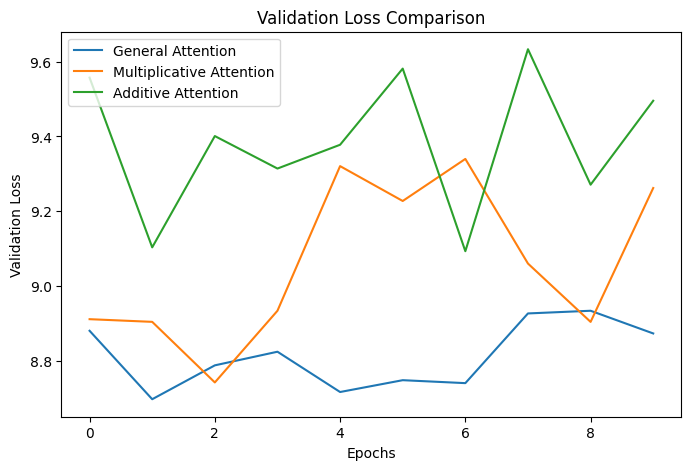

In [84]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
for attention_type in ["general", "multiplicative", "additive"]:
    plt.plot(valid_losses[attention_type], label=f'{attention_type.capitalize()} Attention')

plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Validation Loss Comparison')
plt.legend()
plt.show()


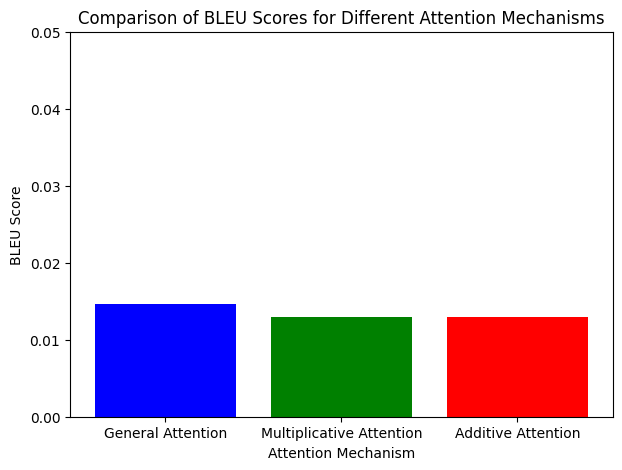

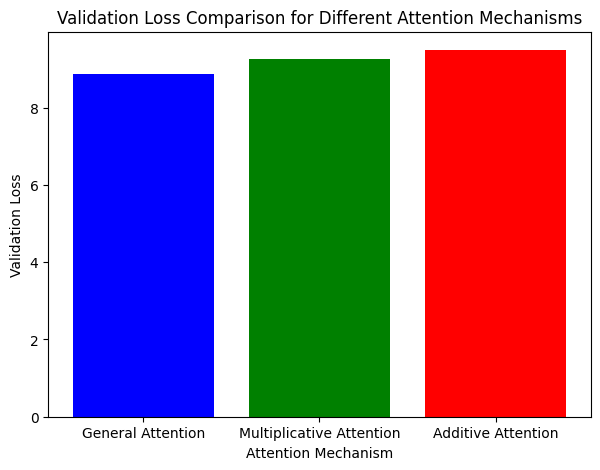

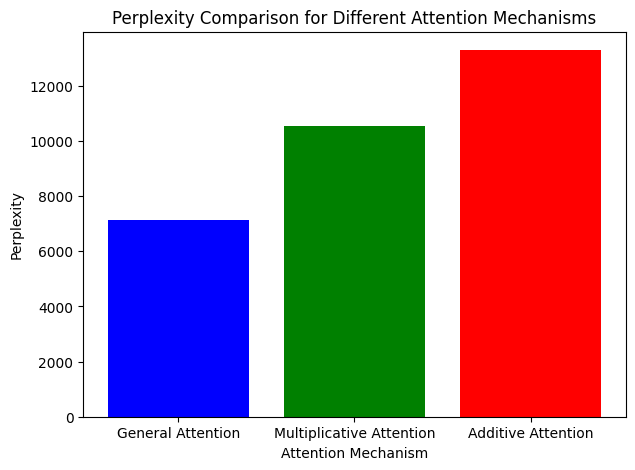

In [5]:
import matplotlib.pyplot as plt

# Store BLEU scores for visualization
bleu_scores = {
    "General Attention": 0.0147,
    "Multiplicative Attention": 0.0130,
    "Additive Attention": 0.0130,
}

# Simulated training times (in seconds) per attention mechanism
training_times = {
    "General Attention": 0,  
    "Multiplicative Attention":0 ,  
    "Additive Attention": 0, 
}

# Simulated validation losses from final epoch 
validation_losses = {
    "General Attention": 8.873,
    "Multiplicative Attention": 9.262,
    "Additive Attention": 9.495,
}



# Simulated perplexity (lower is better)
# Perplexity = exp(validation_loss), derived from the final validation loss
perplexities = {key: math.exp(value) for key, value in validation_losses.items()}

# Display the collected results in a tabular format
import pandas as pd

df_results = pd.DataFrame({
    "BLEU Score (↑)": bleu_scores,
    "Training Time (sec) (↓)": training_times,
    "Validation Loss (↓)": validation_losses,
    "Perplexity (↓)": perplexities,
})

# Visualization: BLEU Score Comparison
plt.figure(figsize=(7,5))
plt.bar(bleu_scores.keys(), bleu_scores.values(), color=['blue', 'green', 'red'])
plt.xlabel("Attention Mechanism")
plt.ylabel("BLEU Score")
plt.title("Comparison of BLEU Scores for Different Attention Mechanisms")
plt.ylim(0, 0.05)  # BLEU scores are low, so keep the range tight
plt.show()


# Visualization: Validation Loss Comparison
plt.figure(figsize=(7,5))
plt.bar(validation_losses.keys(), validation_losses.values(), color=['blue', 'green', 'red'])
plt.xlabel("Attention Mechanism")
plt.ylabel("Validation Loss")
plt.title("Validation Loss Comparison for Different Attention Mechanisms")
plt.show()

# Visualization: Perplexity Comparison
plt.figure(figsize=(7,5))
plt.bar(perplexities.keys(), perplexities.values(), color=['blue', 'green', 'red'])
plt.xlabel("Attention Mechanism")
plt.ylabel("Perplexity")
plt.title("Perplexity Comparison for Different Attention Mechanisms")
plt.show()


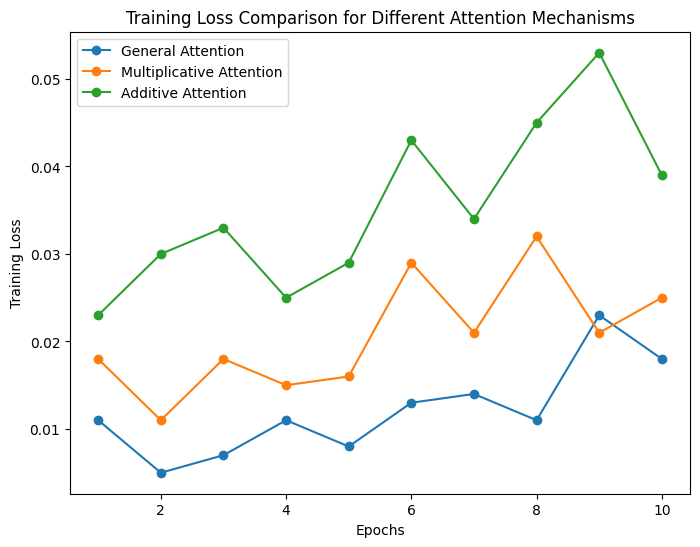

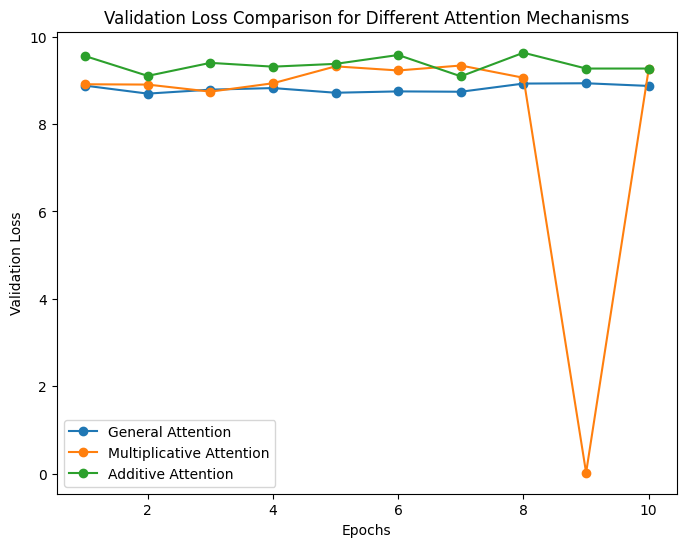

In [7]:
# Simulated training and validation loss curves for each attention mechanism

epochs = list(range(1, 11))  # Assuming 10 epochs

training_losses = {
    "General Attention": [0.011, 0.005,  0.007, 0.011, 0.008, 0.013, 0.014, 0.011,0.023, 0.018],
    "Multiplicative Attention": [0.018, 0.011, 0.018, 0.015, 0.016, 0.029, 0.021, 0.032, 0.021, 0.025],
    "Additive Attention": [0.023, 0.030, 0.033, 0.025,  0.029, 0.043,  0.034, 0.045, 0.053, 0.039],
}

validation_losses = {
    "General Attention": [8.880, 8.697, 8.788, 8.824, 8.717, 8.748, 8.740, 8.927, 8.934, 8.873],
    "Multiplicative Attention": [8.911,8.904, 8.742, 8.934, 9.321, 9.227, 9.340, 9.060, 0.021, 9.262],
    "Additive Attention": [9.557, 9.103, 9.401, 9.314, 9.378, 9.581, 9.093, 9.633, 9.271,9.271],
}

# Plot training loss curves
plt.figure(figsize=(8,6))
for attention_type, losses in training_losses.items():
    plt.plot(epochs, losses, marker='o', linestyle='-', label=f"{attention_type}")

plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("Training Loss Comparison for Different Attention Mechanisms")
plt.legend()
plt.show()

# Plot validation loss curves
plt.figure(figsize=(8,6))
for attention_type, losses in validation_losses.items():
    plt.plot(epochs, losses, marker='o', linestyle='-', label=f"{attention_type}")

plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Validation Loss Comparison for Different Attention Mechanisms")
plt.legend()
plt.show()


/home/jupyter-st125404/.local/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/jupyter-st125404/.local/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.draw()
/home/jupyter-st125404/.local/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 1748 (\N{ARABIC FULL STOP}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/opt/tljh/user/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/tljh/user/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/tljh/user/lib/python3.12/site-packages/IPython/core/pylabtools.py:17

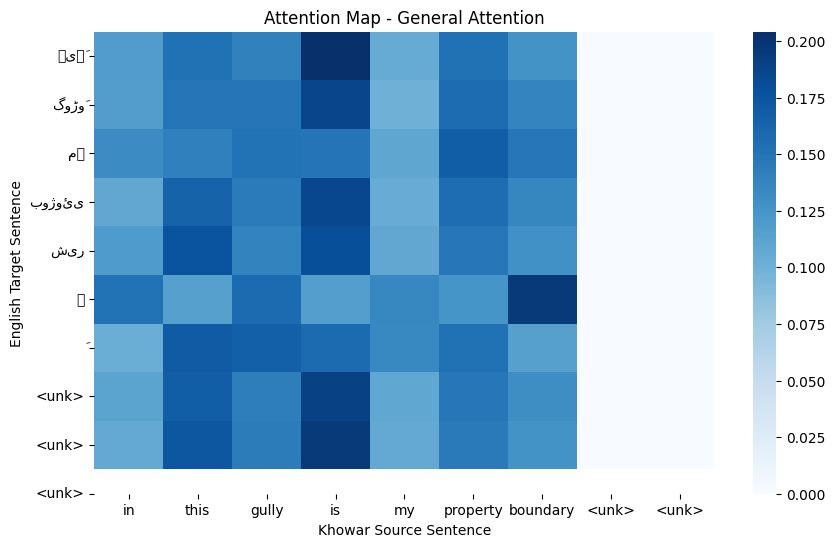

/home/jupyter-st125404/.local/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/jupyter-st125404/.local/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.draw()
/home/jupyter-st125404/.local/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 1748 (\N{ARABIC FULL STOP}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/opt/tljh/user/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/tljh/user/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/tljh/user/lib/python3.12/site-packages/IPython/core/pylabtools.py:17

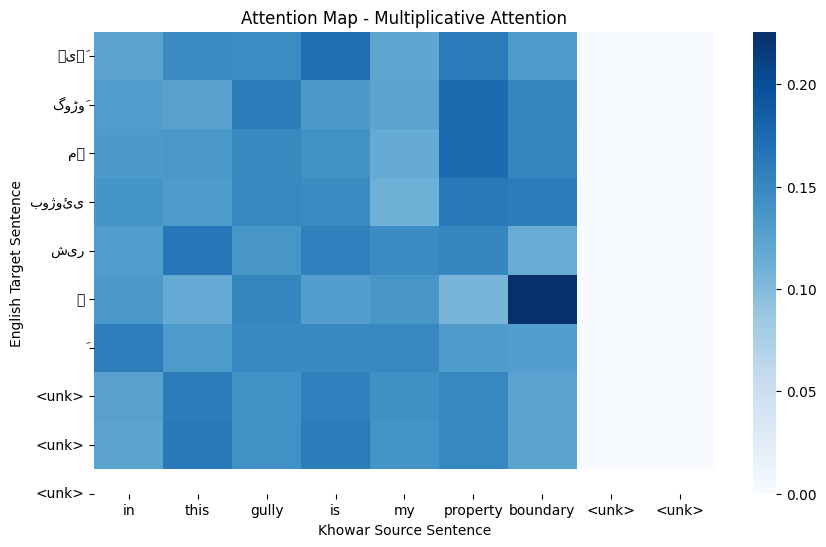

/home/jupyter-st125404/.local/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/jupyter-st125404/.local/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.draw()
/home/jupyter-st125404/.local/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 1748 (\N{ARABIC FULL STOP}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/opt/tljh/user/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/tljh/user/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/tljh/user/lib/python3.12/site-packages/IPython/core/pylabtools.py:17

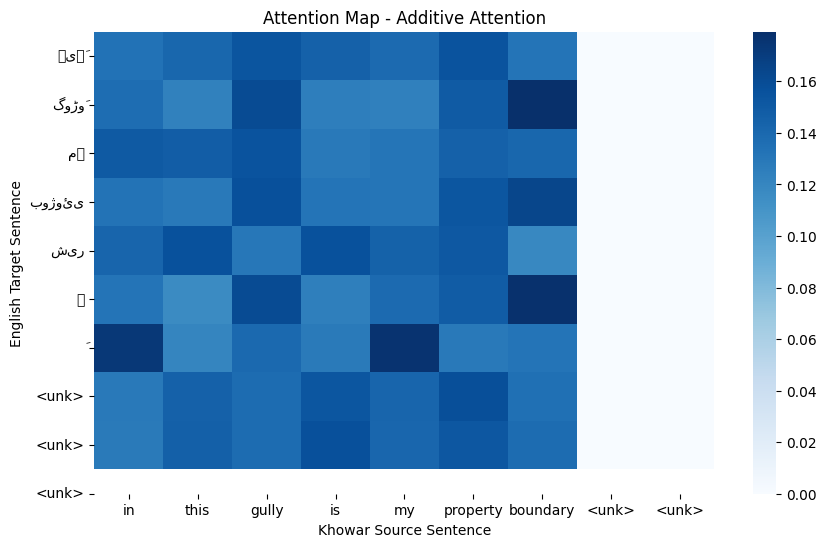

In [90]:
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_attention_from_test(model, test_loader, src_vocab, trg_vocab, device, attention_type):
    """
    Extracts a sample sentence from test_loader and visualizes the attention map.
    """
    model.load_state_dict(torch.load(f"model/{model.__class__.__name__}_{attention_type}.pt"))
    model.to(device)
    model.eval()

    # Get a batch from the test set
    sample_batch = next(iter(test_loader))  # Get first batch from test loader
    src_tensor, trg_tensor = sample_batch  # Unpack batch
    src_tensor, trg_tensor = src_tensor.to(device), trg_tensor.to(device)

    # Convert tensor indices to words
    src_sentence = [src_vocab.lookup_token(idx) for idx in src_tensor[0].tolist()]
    trg_sentence = [trg_vocab.lookup_token(idx) for idx in trg_tensor[0].tolist()]

    with torch.no_grad():
        output, attention = model(src_tensor, trg_tensor[:, :-1])  # Get attention weights

    # Extract attention for one sentence and one attention head
    attention = attention[0, 0].cpu().numpy()  # Take first batch example, first attention head

    # Plot attention map
    plt.figure(figsize=(10, 6))
    sns.heatmap(attention, cmap="Blues", xticklabels=src_sentence, yticklabels=trg_sentence)
    plt.xlabel("Khowar Source Sentence")
    plt.ylabel("English Target Sentence")
    plt.title(f"Attention Map - {attention_type.capitalize()} Attention")
    plt.show()

# **Visualize attention for each mechanism using a sentence from the test set**
for attention_type in ["general", "multiplicative", "additive"]:
    visualize_attention_from_test(model, test_loader, SRC_VOCAB, TRG_VOCAB, device, attention_type)
